# Introdução ao Pandas


O Pandas é um módulo do Python que permite o manuseio mais fácil de dados tabulares. Já que o curso é focado em ciência de dados, esta é uma tarefa que faremos com frequência.

É um dos três módulos que você mais encontrará no campo de ciência de dados:


## Pandas

Introduz DataFrames e Series, que permitem que você manuseie linhas e colunas de informação.

## NumPy

Normalmente você encontrará Numpy arrays, que são objetos de arrays multidimensionais. É fácil criar DataFrames do Pandas a partir de um array NumPy, assim como podemos transformar DataFrames em arrays Numpy. E eles são importantes por causa do...



## Scikit_Learn

O módulo de machine learning que usaremos durante o curso é o scikit_learn, ou sklearn, geralmente utiliza arrays NumPy como variáveis de entrada.

Uma coisa que iremos fazer tipicamente é carregar, limpar e manipular nossos dados de entrada utilizando Pandas, depois converter os DataFrames em um array Numpy e passá-los para uma função do scikit_learn. Esta conversão pode geralmente acontecer automaticamente.

Vamos começar carregando um arquivo .csv utilizando Pandas e Dataframes:

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

df_orig = pd.read_excel("/content/HIST_PAINEL_COVIDBR_20200516.xlsx")
df = df_orig[df_orig['data'] == '2020-05-11'].reset_index()

Podemos ter uma ideia de como nossos dados estão distribuidos estatisticamente no nosso dataset por meio do método describe()

In [0]:
df.describe()

,index,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
count,2905.000000,2905.000000,2877.000000,2865.000000,2905.0,2.893000e+03,2905.000000,2905.000000,1.0,1.0
mean,39320.556627,30.539071,306729.458464,30559.938220,20.0,2.089868e+05,173.835800,11.895697,67384.0,89429.0
std,23624.987857,9.720647,96845.245389,9660.418208,0.0,4.081506e+06,3363.438496,236.485050,NaN,NaN
min,75.000000,11.000000,110001.000000,11001.000000,20.0,1.149000e+03,1.000000,0.000000,67384.0,89429.0
25%,18992.000000,23.000000,231230.000000,23020.000000,20.0,1.101900e+04,2.000000,0.000000,67384.0,89429.0
50%,38286.000000,31.000000,311050.000000,31011.000000,20.0,2.160200e+04,5.000000,0.000000,67384.0,89429.0
75%,59606.000000,35.000000,355020.000000,35157.000000,20.0,4.606900e+04,16.000000,1.000000,67384.0,89429.0
max,82276.000000,76.000000,530010.000000,53001.000000,20.0,2.101471e+08,168331.000000,11519.000000,67384.0,89429.0


Podemos ter informações sobre os tipos de dados salvos em cada coluna e quantos deles não são nulos com o método info()


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  2905 non-null   int64  
 1   regiao                 2905 non-null   object 
 2   estado                 2904 non-null   object 
 3   municipio              2865 non-null   object 
 4   coduf                  2905 non-null   int64  
 5   codmun                 2877 non-null   float64
 6   codRegiaoSaude         2865 non-null   float64
 7   nomeRegiaoSaude        2865 non-null   object 
 8   data                   2905 non-null   object 
 9   semanaEpi              2905 non-null   int64  
 10  populacaoTCU2019       2893 non-null   float64
 11  casosAcumulado         2905 non-null   int64  
 12  obitosAcumulado        2905 non-null   int64  
 13  Recuperadosnovos       1 non-null      float64
 14  emAcompanhamentoNovos  1 non-null      float64
dtypes: f

O método head() é um jeito fácil de visualizar os dados que você carregou. Você pode passar um inteiro para ver um número específico de linhas no começo do seu DataFrame:

In [0]:
df.head(10)

,index,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
0,75,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-05-11,20,210147125.0,168331,11519,67384.0,89429.0
1,122,Centro-Oeste,MS,Alcinópolis,50,500025.0,50001.0,Campo Grande,2020-05-11,20,5343.0,1,0,NaN,NaN
2,129,Centro-Oeste,MS,Amambai,50,500060.0,50003.0,Dourados,2020-05-11,20,39396.0,1,0,NaN,NaN
3,156,Centro-Oeste,MS,Bataguassu,50,500190.0,50004.0,Três Lagoas,2020-05-11,20,23024.0,3,0,NaN,NaN
4,206,Centro-Oeste,MS,Batayporã,50,500200.0,50003.0,Dourados,2020-05-11,20,11329.0,6,2,NaN,NaN
5,215,Centro-Oeste,MS,Bela Vista,50,500210.0,50001.0,Campo Grande,2020-05-11,20,24629.0,2,0,NaN,NaN
6,224,Centro-Oeste,MS,Bonito,50,500220.0,50001.0,Campo Grande,2020-05-11,20,21976.0,4,0,NaN,NaN
7,236,Centro-Oeste,MS,Brasilândia,50,500230.0,50004.0,Três Lagoas,2020-05-11,20,11872.0,13,0,NaN,NaN
8,288,Centro-Oeste,MS,Campo Grande,50,500270.0,50001.0,Campo Grande,2020-05-11,20,895982.0,155,4,NaN,NaN
9,330,Centro-Oeste,MS,Chapadão do Sul,50,500295.0,50001.0,Campo Grande,2020-05-11,20,25218.0,9,0,NaN,NaN


Você também pode ver o fim do seus dados com tail():



In [0]:
df.tail(10)

,index,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
2895,82022,Sul,RS,Veranópolis,43,432280.0,43025.0,Região 25 - Vinhedos e Basalto,2020-05-11,20,26241.0,3,0,NaN,NaN
2896,82072,Sul,RS,Viamão,43,432300.0,43010.0,Região 10 - Capital e Vale do Gravataí,2020-05-11,20,255224.0,29,3,NaN,NaN
2897,82097,Sul,RS,Victor Graeff,43,432320.0,43017.0,Região 17 - Planalto,2020-05-11,20,2882.0,3,0,NaN,NaN
2898,82103,Sul,RS,Vila Flores,43,432330.0,43025.0,Região 25 - Vinhedos e Basalto,2020-05-11,20,3385.0,1,0,NaN,NaN
2899,82114,Sul,RS,Vila Lângaro,43,432335.0,43018.0,Região 18 - Araucárias,2020-05-11,20,2091.0,1,1,NaN,NaN
2900,82158,Sul,RS,Vila Maria,43,432340.0,43017.0,Região 17 - Planalto,2020-05-11,20,4358.0,2,0,NaN,NaN
2901,82176,Sul,RS,Vista Alegre do Prata,43,432360.0,43025.0,Região 25 - Vinhedos e Basalto,2020-05-11,20,1561.0,1,1,NaN,NaN
2902,82189,Sul,RS,Westfália,43,432377.0,43030.0,Região 30 - Vale da Luz,2020-05-11,20,3014.0,2,0,NaN,NaN
2903,82208,Sul,RS,Xangri-lá,43,432380.0,43004.0,Região 04 - Belas Praias,2020-05-11,20,16408.0,1,0,NaN,NaN
2904,82276,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-11,20,11377239.0,2576,105,NaN,NaN


Podemos também falar do "shape", ou formato do seu DataFrame. Isso se refere as suas dimensões. Este arquivo CSV tem 2905 linhas com 15 
colunas por linha:


In [0]:
df.shape

(2905, 15)

O tamanho total do Dataframe é o número de linhas * colunas:


In [0]:
df.size

43575

A função len() dá o número de linhas em um DataFrame:


In [0]:
len(df)

2905

Se o seu DataFrame tem colunas com nomes (no nosso caso, extraídas automaticamente da primeira linha do arquivo .csv), você pode acessá-los normalmente

In [0]:
df.columns

Index(['index', 'regiao', 'estado', 'municipio', 'coduf', 'codmun',
       'codRegiaoSaude', 'nomeRegiaoSaude', 'data', 'semanaEpi',
       'populacaoTCU2019', 'casosAcumulado', 'obitosAcumulado',
       'Recuperadosnovos', 'emAcompanhamentoNovos'],
      dtype='object')

Ao extrair uma coluna do seu DataFrame você terá uma "Series" do Pandas, que parece com isto:

In [0]:
df['municipio']

0                         NaN
1                 Alcinópolis
2                     Amambai
3                  Bataguassu
4                   Batayporã
                ...          
2900               Vila Maria
2901    Vista Alegre do Prata
2902                Westfália
2903                Xangri-lá
2904                      NaN
Name: municipio, Length: 2905, dtype: object

Você também pode extrair uma faixa das linhas de uma coluna com nome, deste modo:


In [0]:
df['municipio'][:5]

0            NaN
1    Alcinópolis
2        Amambai
3     Bataguassu
4      Batayporã
Name: municipio, dtype: object

Ou até extrair um único valor de uma combinação específica de linha e coluna:

In [0]:
df['municipio'][717]

'João Pessoa'

Para extrair mais de uma coluna, você passa um array com os nomes da coluna ao invés de apenas um:

In [0]:
df[['municipio', 'casosAcumulado']]

,municipio,casosAcumulado
0,NaN,168331
1,Alcinópolis,1
2,Amambai,1
3,Bataguassu,3
4,Batayporã,6
...,...,...
2900,Vila Maria,2
2901,Vista Alegre do Prata,1
2902,Westfália,2
2903,Xangri-lá,1


Você pode também extrair faixas específicas de linhas de mais de uma coluna, de um jeito já visto:


In [0]:
df[['municipio', 'casosAcumulado']][:5]

,municipio,casosAcumulado
0,NaN,168331
1,Alcinópolis,1
2,Amambai,1
3,Bataguassu,3
4,Batayporã,6


Podemos, inclusive, buscar por informações específicas em um dataframe, de um modo semelhante a como buscaríamos em um banco de dados

In [0]:
df['municipio'] == 'João Pessoa'

0       False
1       False
2       False
3       False
4       False
        ...  
2900    False
2901    False
2902    False
2903    False
2904    False
Name: municipio, Length: 2905, dtype: bool

Isso nos gerará uma Série de booleanos, que podemos utilizar para construir um novo dataframe apenas com os dados que queremos

In [0]:
df[df['municipio'] == 'João Pessoa']

,index,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
717,18857,Nordeste,PB,João Pessoa,25,250750.0,25001.0,1ª Região Mata Atlântica,2020-05-11,20,809015.0,1230,59,NaN,NaN


Ordenar o seu DataFrame de acordo com uma coluna específica pode ser feito desse modo:


In [0]:
df.sort_values(['casosAcumulado'])

,index,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
0,75,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-05-11,20,210147125.0,168331,11519,67384.0,89429.0
2393,66013,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-05-11,20,45919049.0,46131,3743,NaN,NaN
2332,64336,Sudeste,SP,São Paulo,35,355030.0,35016.0,São Paulo,2020-05-11,20,12252023.0,27771,2283,NaN,NaN
1978,53542,Sudeste,RJ,NaN,33,NaN,NaN,NaN,2020-05-11,20,17264943.0,17939,1770,NaN,NaN
582,15224,Nordeste,CE,NaN,23,NaN,NaN,NaN,2020-05-11,20,9132078.0,17599,1189,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,60921,Sudeste,SP,Nova Campina,35,353282.0,35162.0,Itapeva,2020-05-11,20,9755.0,1,0,NaN,NaN
2222,60929,Sudeste,SP,Nova Europa,35,353290.0,35032.0,Centro Oeste do DRS III,2020-05-11,20,11186.0,1,0,NaN,NaN
688,18239,Nordeste,PB,Borborema,25,250270.0,25002.0,2ª Região,2020-05-11,20,5263.0,1,0,NaN,NaN
2224,60959,Sudeste,SP,Nova Guataporanga,35,353310.0,35111.0,Alta Paulista,2020-05-11,20,2316.0,1,0,NaN,NaN


Você pode separar o número de valores únicos em uma coluna para uma Série usando value_counts(), este é um bom modo de entender a distribuição de seus dados:

In [0]:
regioes = df['regiao'].value_counts()
regioes

Nordeste        1092
Sudeste          824
Sul              511
Norte            323
Centro-Oeste     154
Brasil             1
Name: regiao, dtype: int64

O Pandas até facilita a plotagem de Series ou DataFrames, só chamar o método plot():


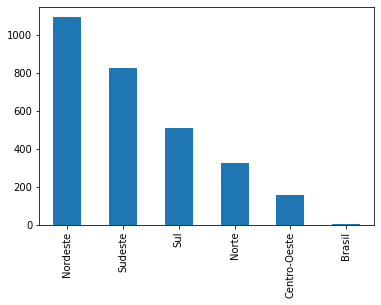

In [0]:
regioes.plot(kind='bar')

## Exercício

Teste extrair algumas informações do nosso DataFrame, preservando apenas as colunas "regiao" e "casosAcumulado". Atribua-os a um novo Dataframe e crie um plot de barras com o acumulado de casos para cada região

#### Dica
Busque sobre o funcionamento do método groupby

Com o dataframe original, crie um plot de dias x casosAcumulado no município de João Pessoa. Mude o gráfico para logaritmico para visualizar melhor os dados depois disso.

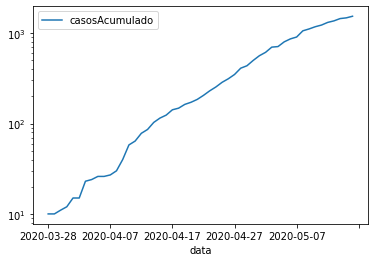